In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('transformed.csv', index_col=0)

In [3]:
df.head()

,gender,age,country,education_level,undergrad_major,role,employer_industry,years_experience,yearly_compensation
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000"
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000"


In [23]:
df_tf = pd.get_dummies(df[[c for c in df.columns if c != 'yearly_compensation']], dummy_na=False)
df_tf.shape

(12956, 141)

In [24]:
target = df['yearly_compensation']

In [25]:
from pandas.api.types import CategoricalDtype

# transforming compensation into category type and ordening the values
categ = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000',
         '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000',
         '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000',
         '300-400,000', '400-500,000', '500,000+']
cat_type = CategoricalDtype(categories=categ, ordered=True)
target = target.astype(cat_type)

In [26]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_tf, target, test_size=.25, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tqdm

In [28]:
models = []
for i, cat in tqdm.tqdm(enumerate(target.cat.categories[:-1])):
#     print(i, cat, categ[:i + 1], categ[i + 1:])
    labels = [0] * len(categ[:i+1]) + [1] * len(categ[i + 1:])
    map = {cat: labels[j] for j, cat in enumerate(categ)}
    new_target = train_y.replace(map)
    mod = RandomForestClassifier(random_state=42, n_estimators=100)
    mod.fit(train_X, new_target)
    models.append(mod)


0it [00:00, ?it/s]
1it [00:01,  1.56s/it]
2it [00:03,  1.56s/it]
3it [00:04,  1.56s/it]
4it [00:06,  1.55s/it]
5it [00:07,  1.58s/it]
6it [00:09,  1.60s/it]
7it [00:10,  1.56s/it]
8it [00:12,  1.53s/it]
9it [00:13,  1.50s/it]
10it [00:15,  1.46s/it]
11it [00:16,  1.42s/it]
12it [00:17,  1.33s/it]
13it [00:18,  1.20s/it]
14it [00:19,  1.10s/it]
15it [00:20,  1.01it/s]
16it [00:20,  1.11it/s]
17it [00:21,  1.25it/s]

In [29]:
import numpy as np

In [30]:
def seq_predict_sample(sample, models):
    """
    Given list of binary classifiers and a sample, predict the most probable category index and the distribution
    """
    binary_probabilities = [mod.predict_proba(sample) for mod in models]
    neg_probs = [p[0][0] for p in binary_probabilities]
    pos_probs = [p[0][1] for p in binary_probabilities]
    bin_probabilities = []
    for i in range(len(models)):
        bin_prob = [p for p in pos_probs[:i]] + [neg_probs[i]]
        reduced = reduce(prod, bin_prob)
        bin_probabilities.append(reduced)
    bin_probabilities.append(reduce(prod, pos_probs))
    return np.argmax(bin_probabilities), bin_probabilities

In [31]:
def predict_multimodel(X):
    """
    Predict value using sequential binary classification
    """
    y_pred = []
    for i, row in tqdm.tqdm(X.iterrows()):
        y_idx, _ = seq_predict_sample(row.values.reshape(1, -1), models)
        y_pred.append(categ[y_idx])
    return y_pred

In [32]:
from functools import reduce
prod = lambda x, y: x * y

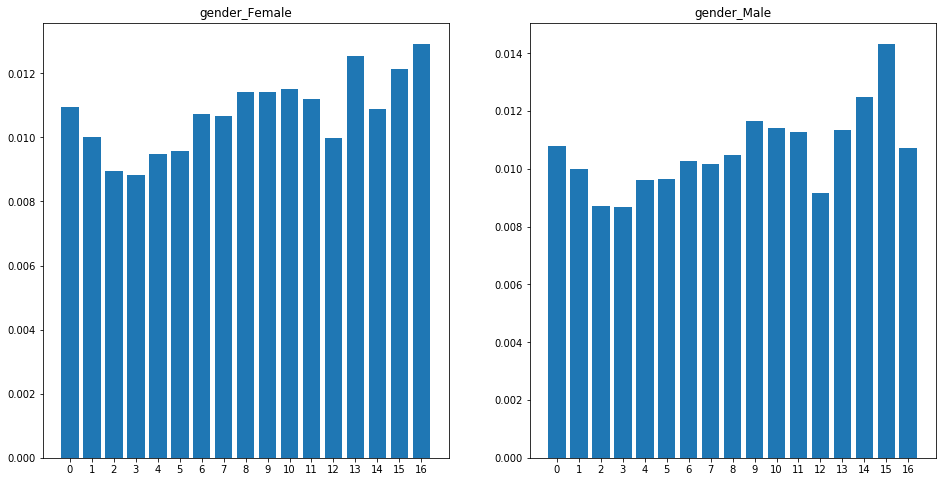

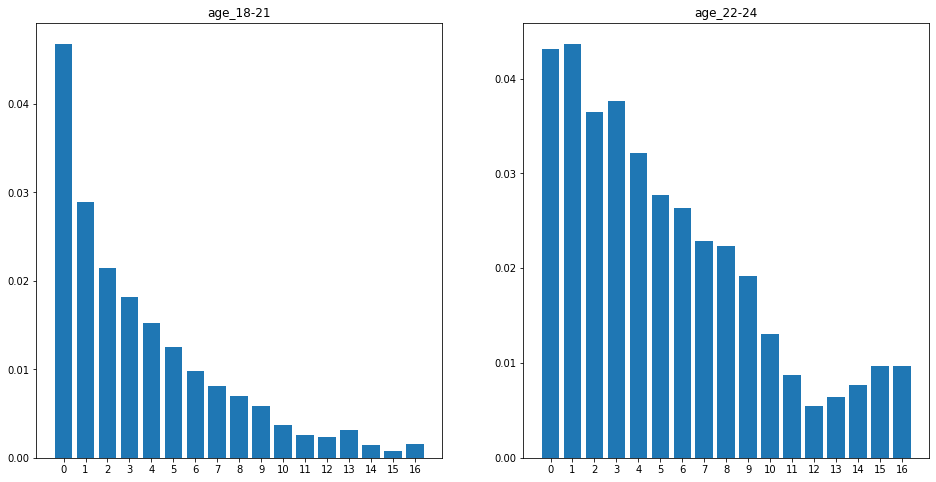

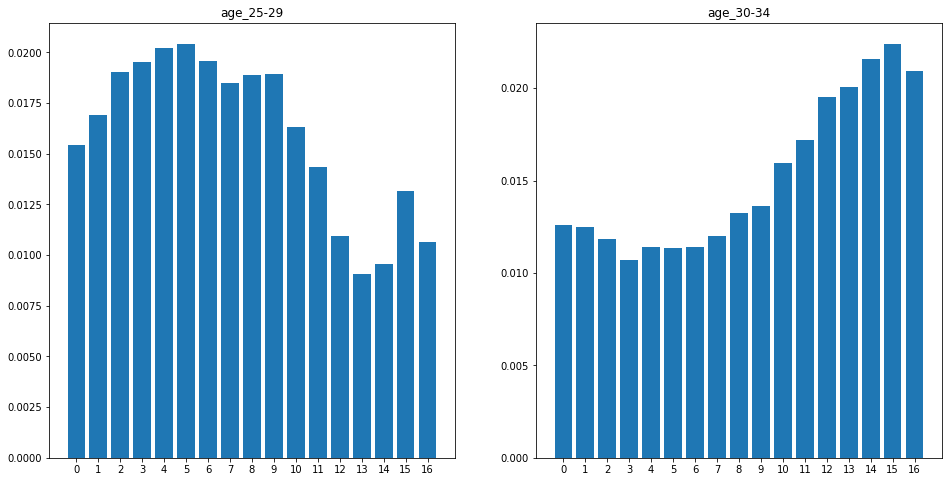

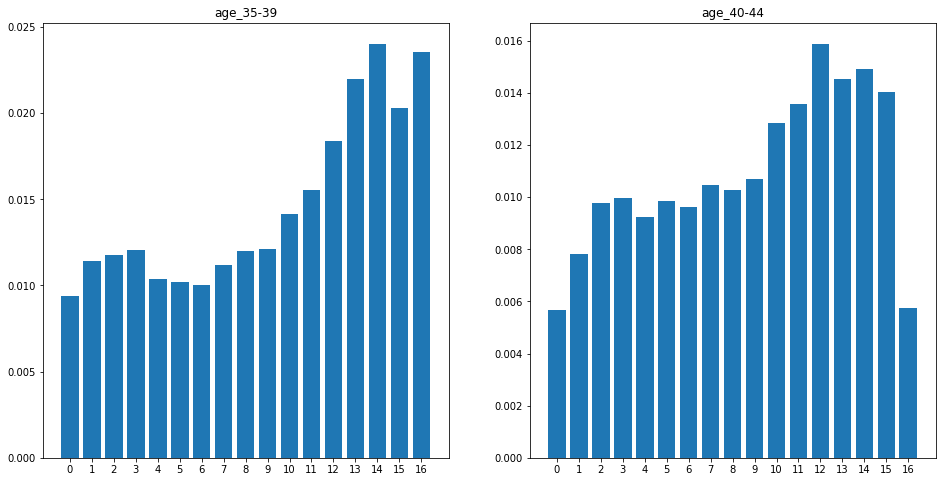

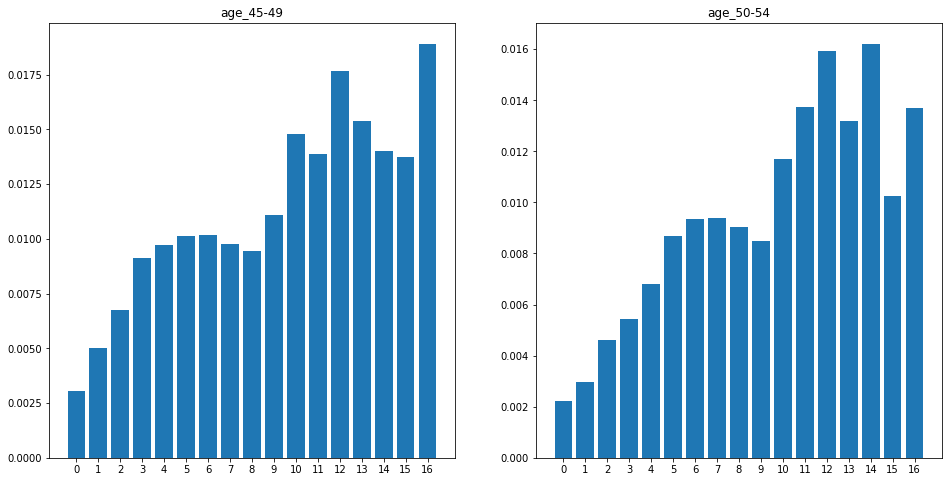

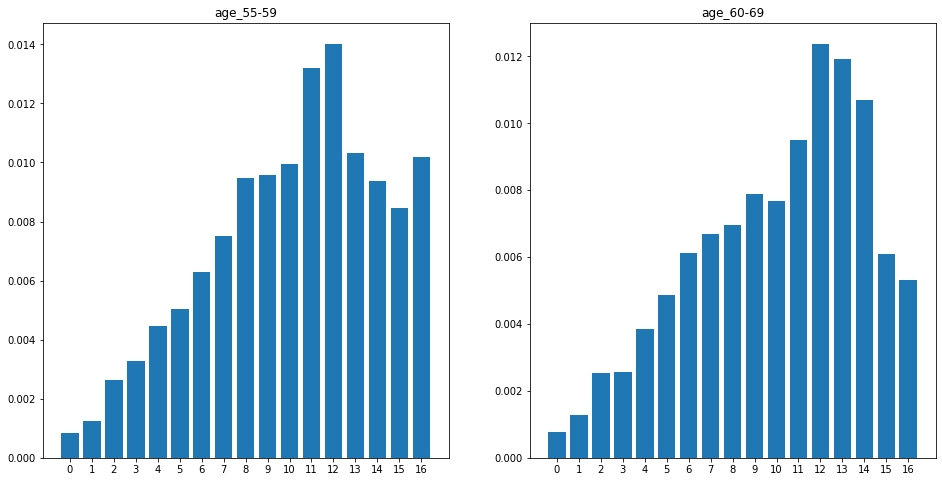

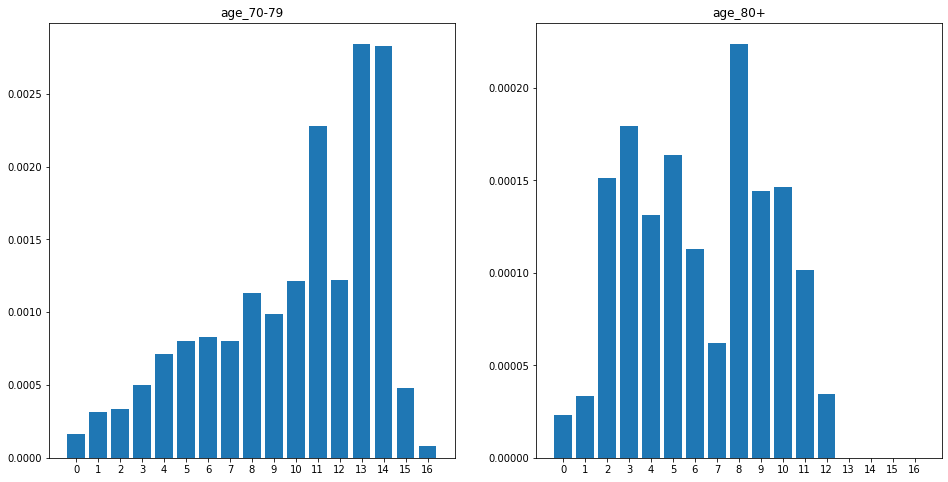

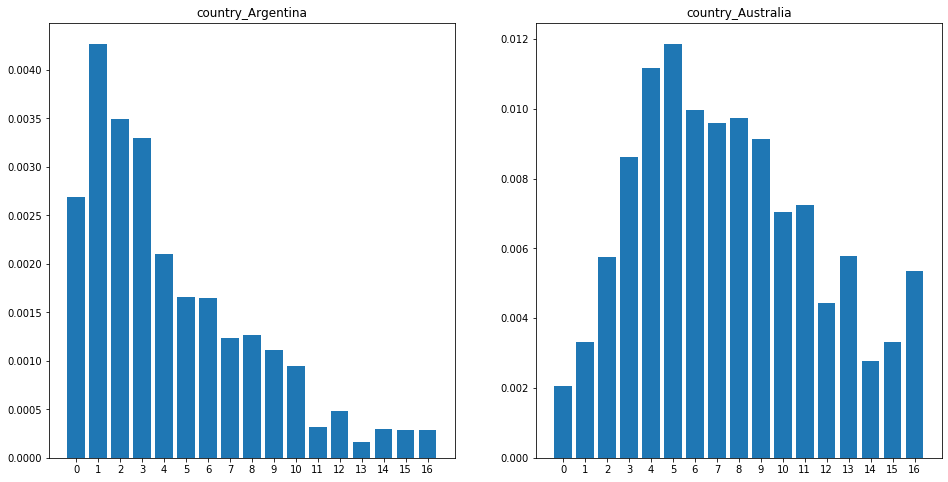

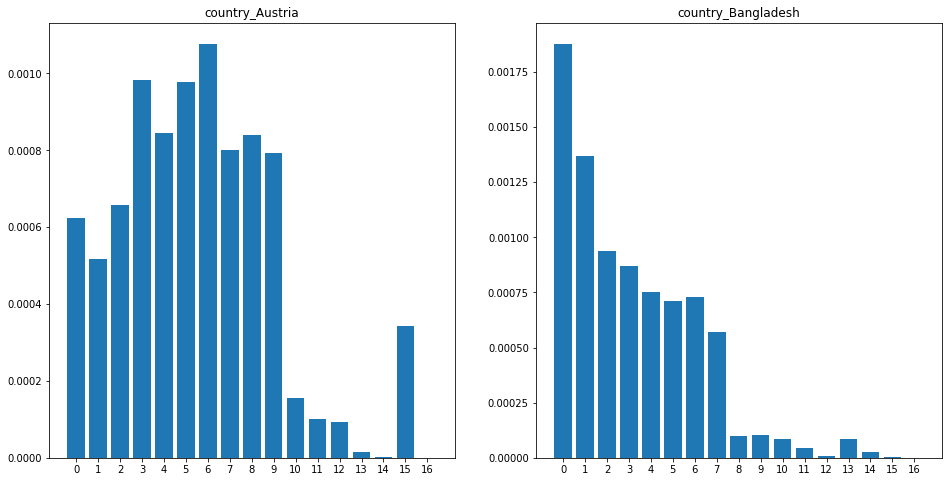

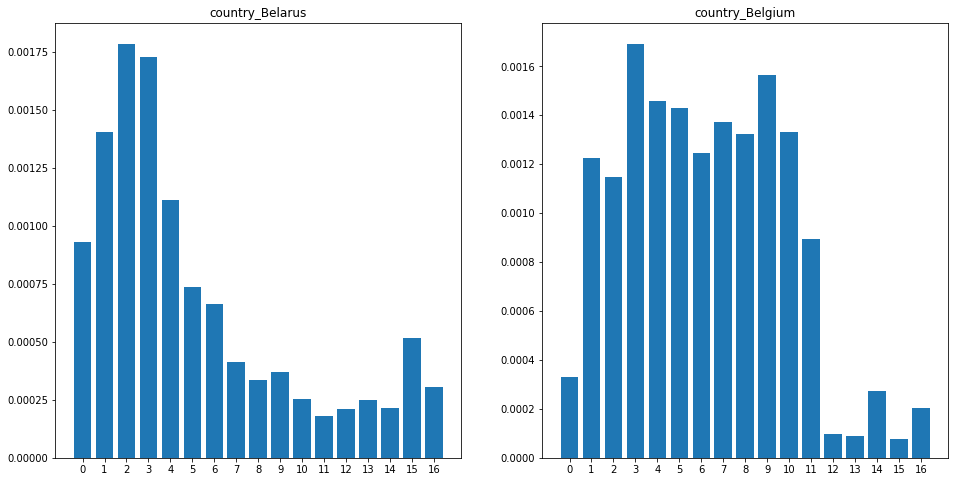

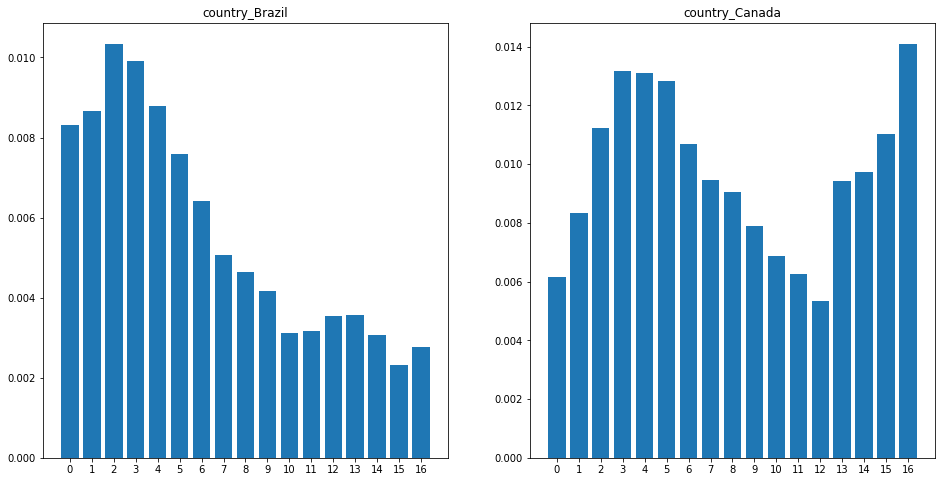

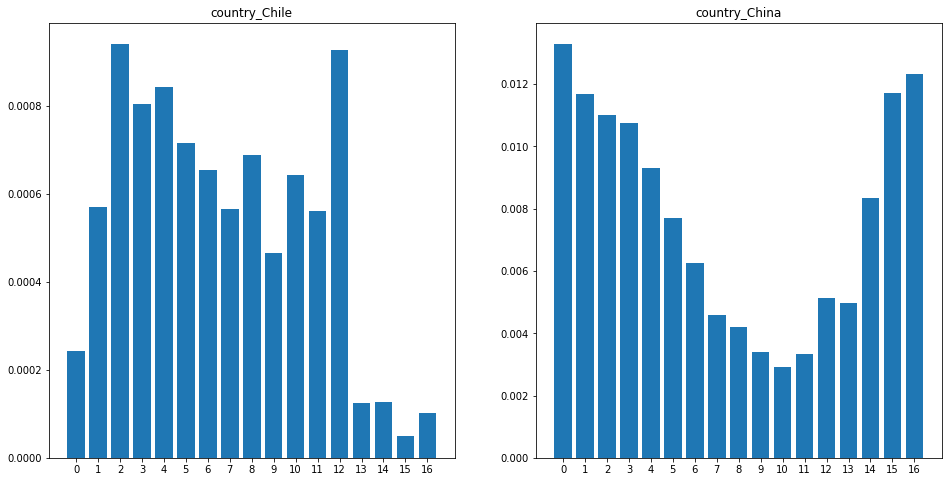

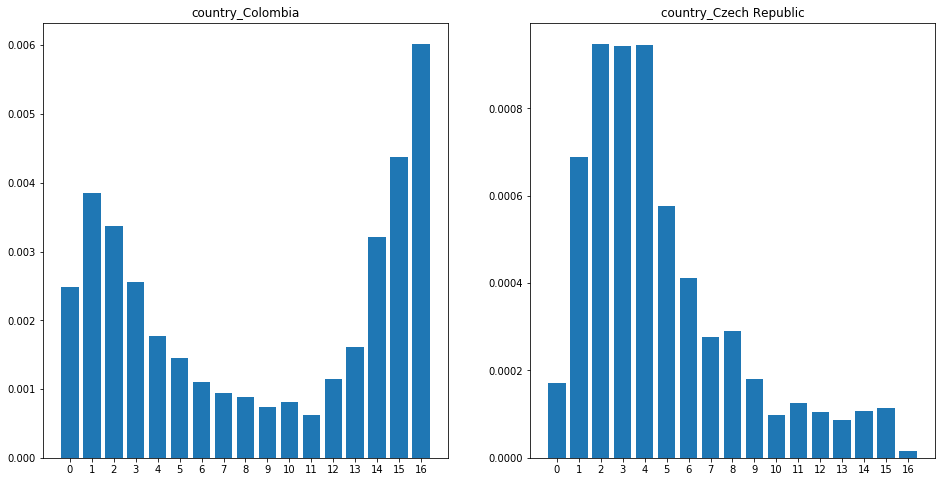

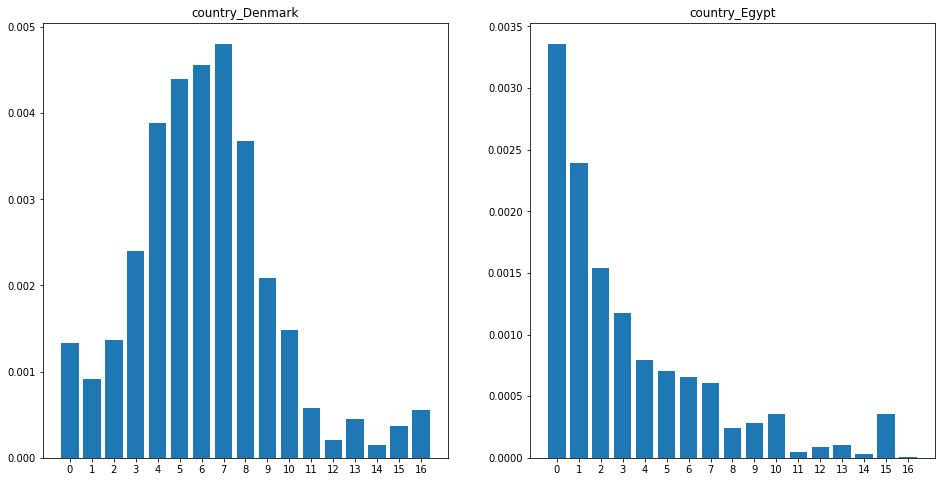

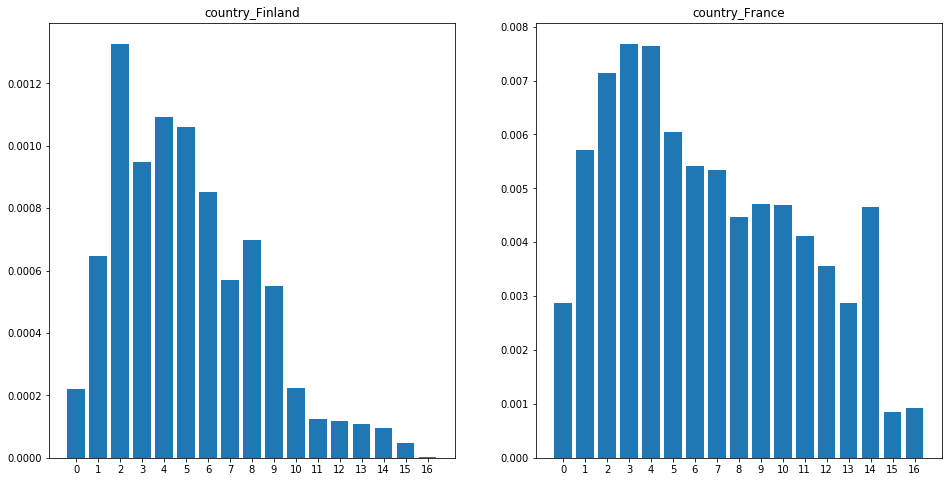

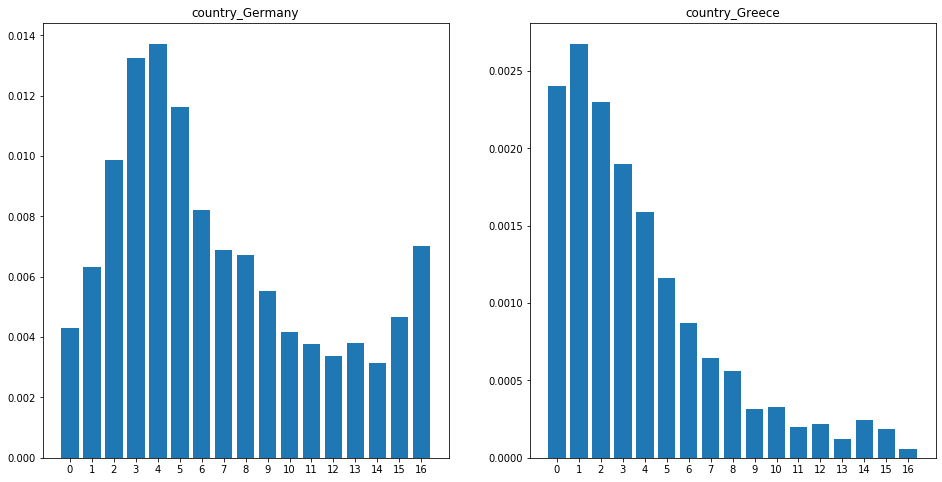

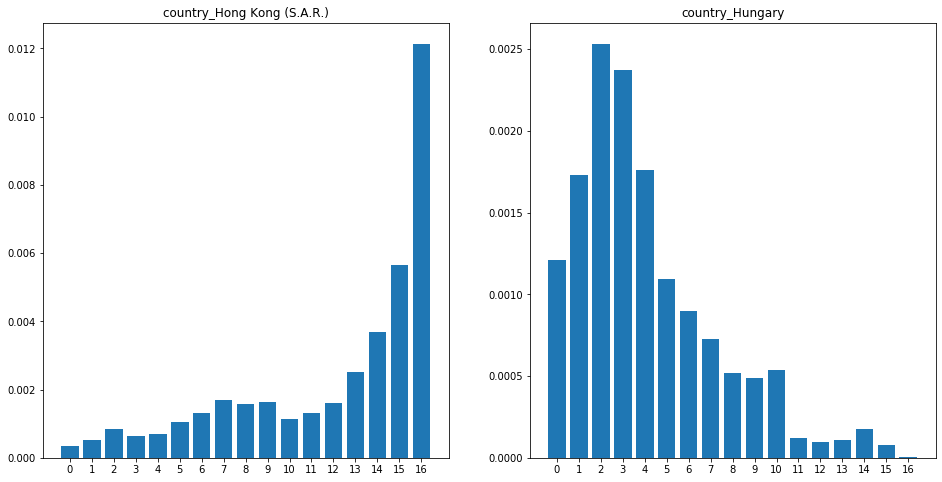

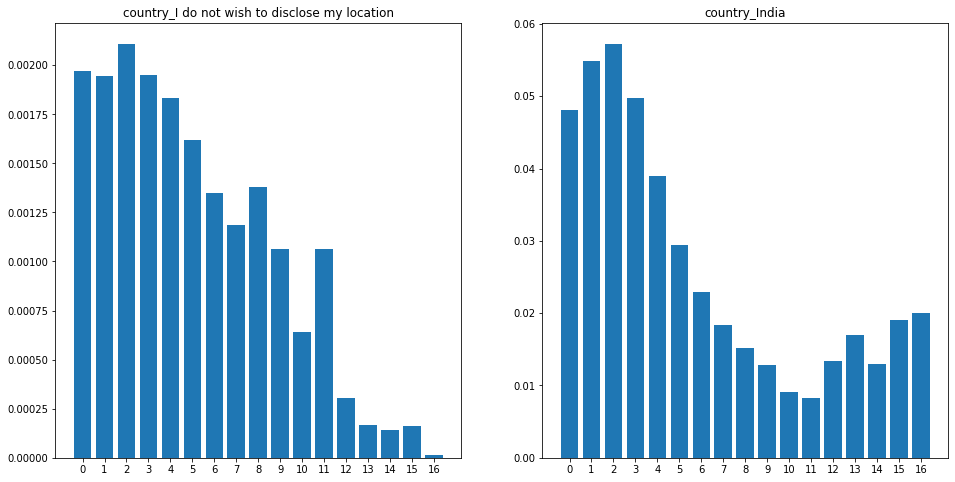

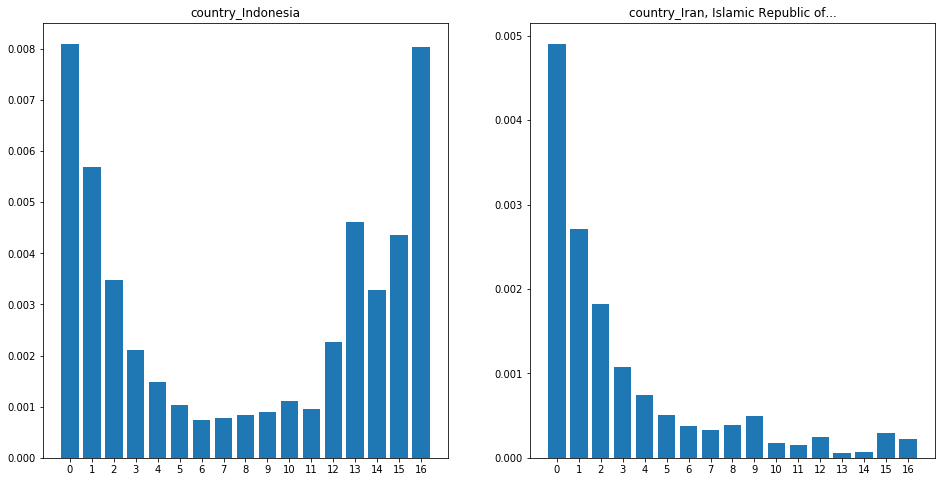

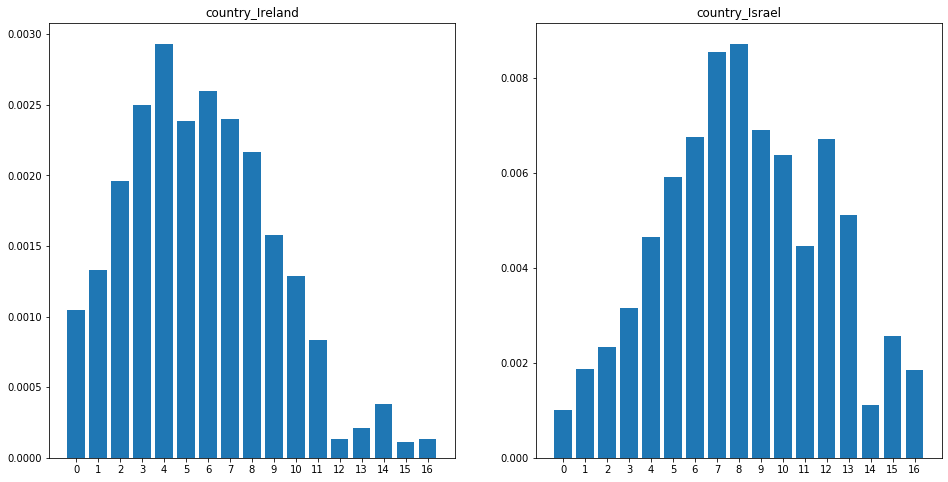

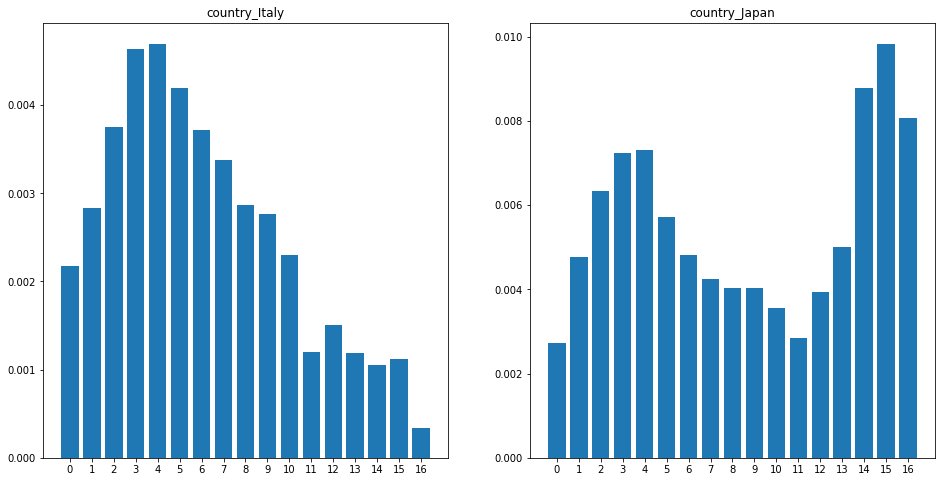

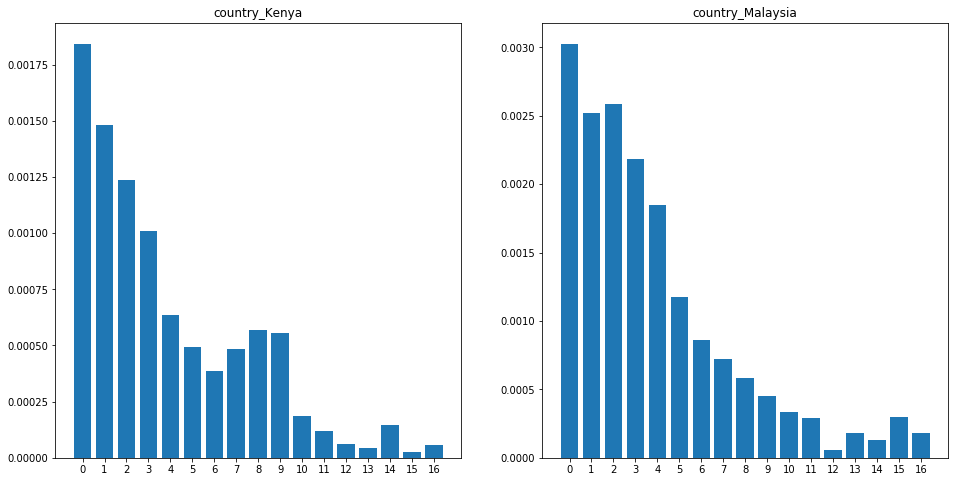

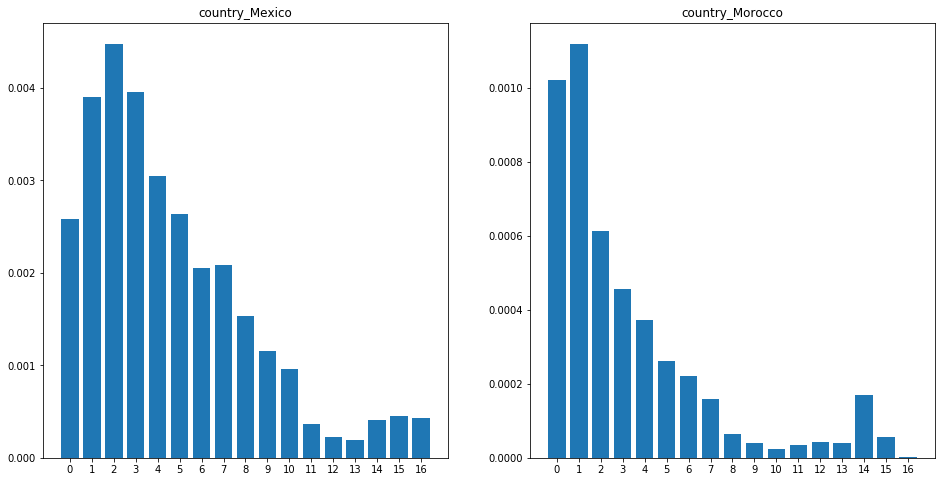

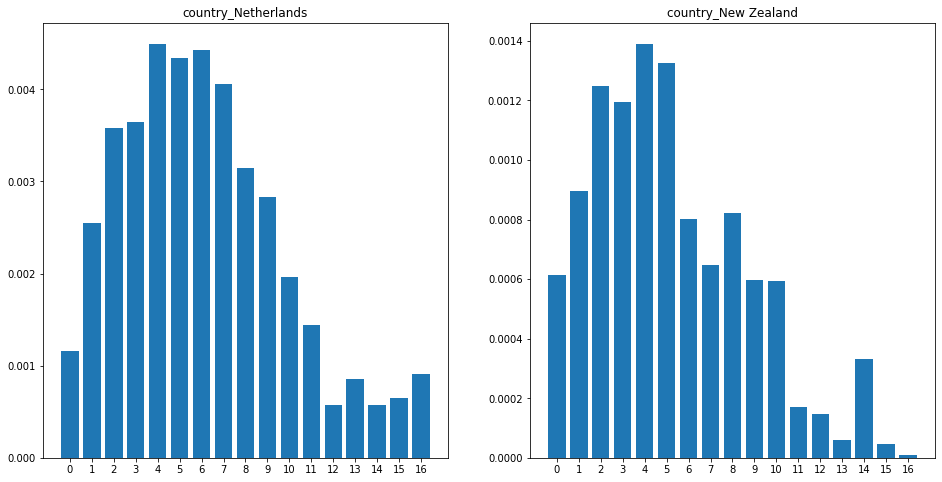

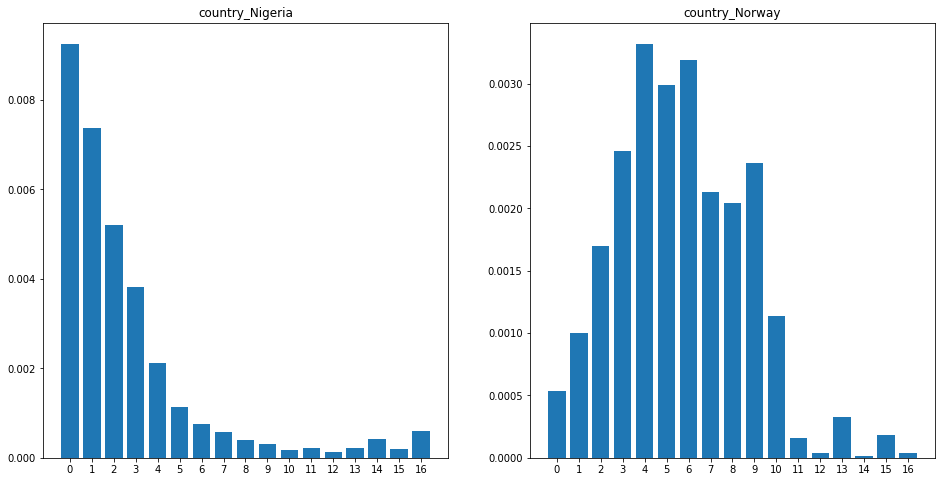

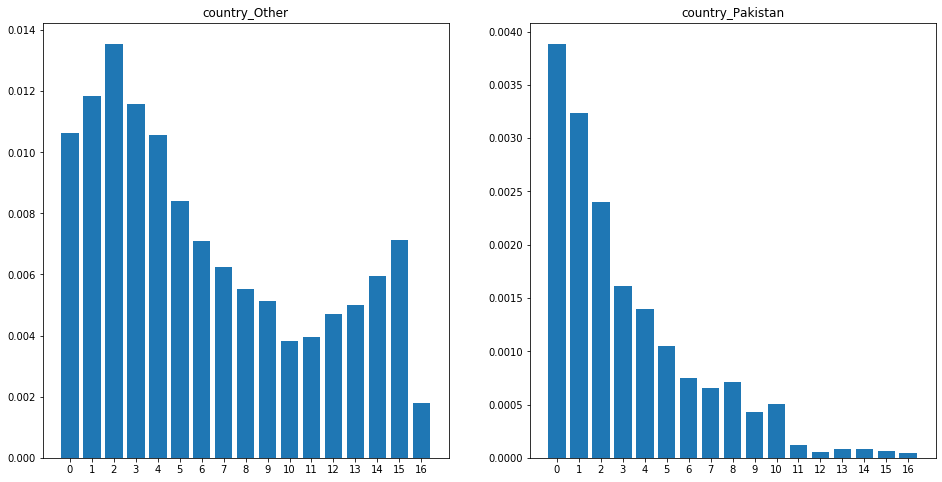

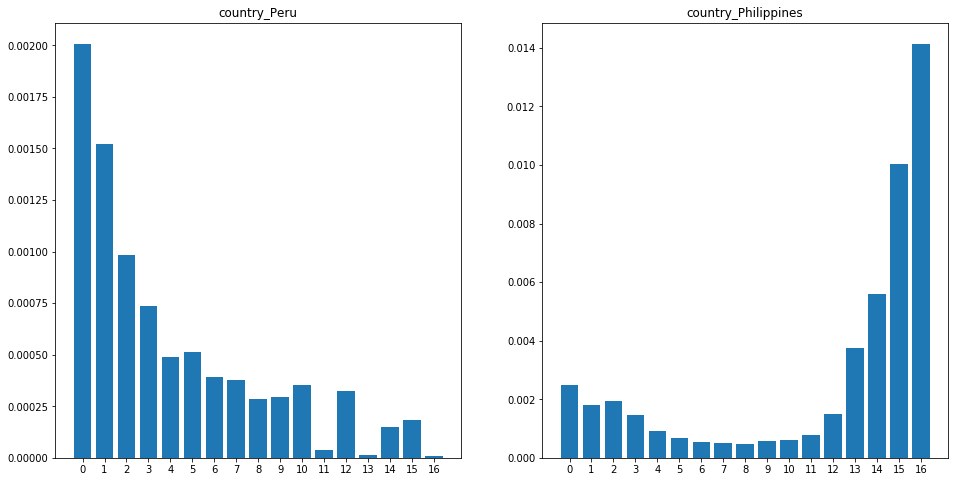

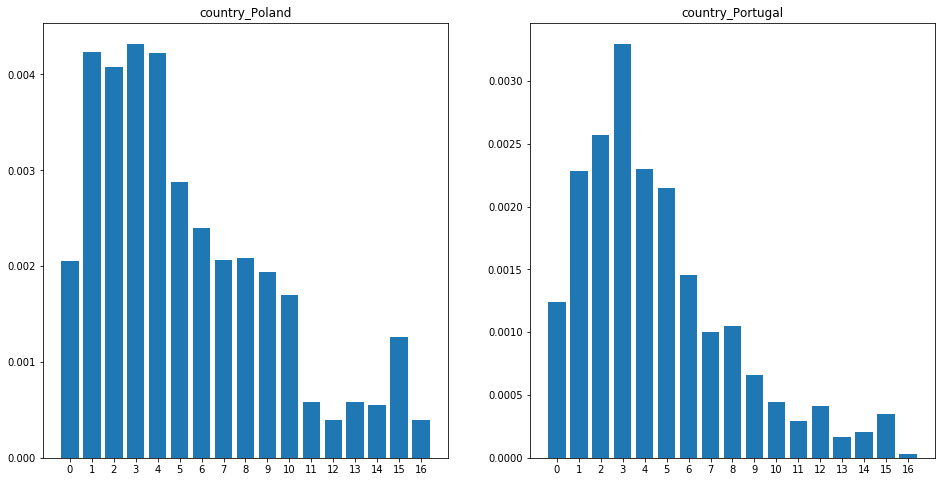

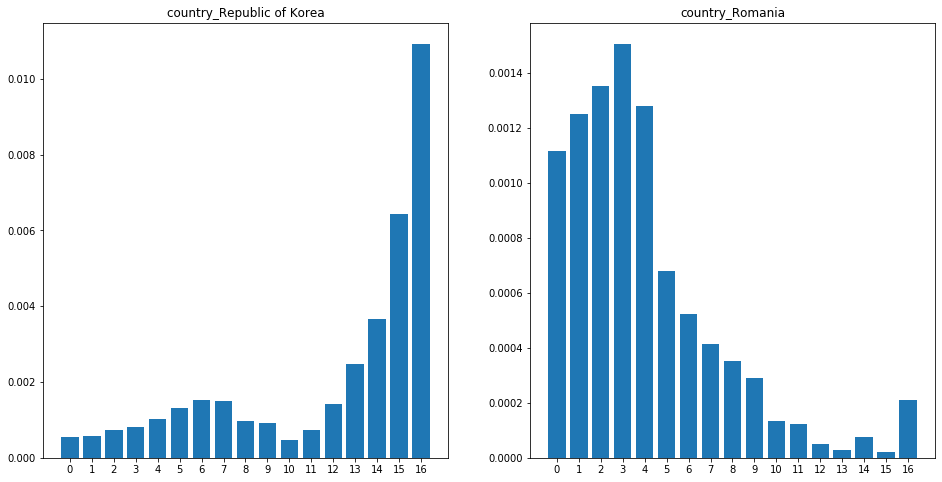

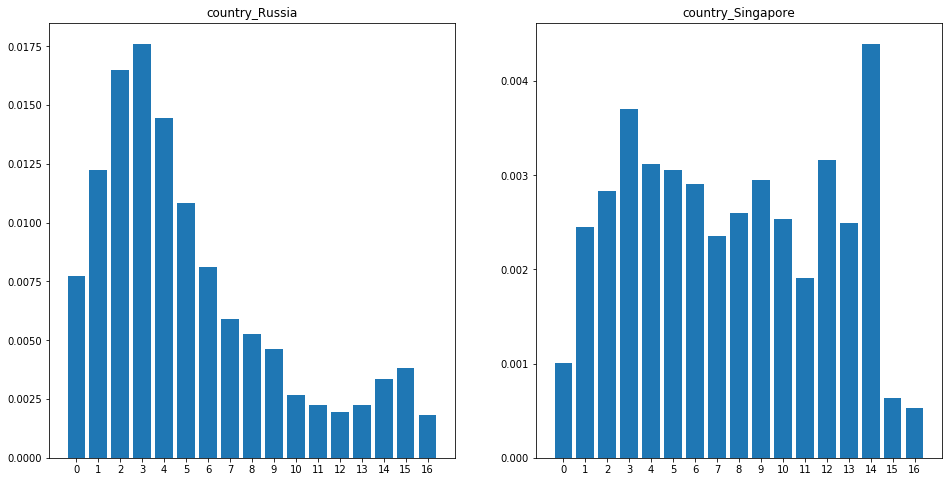

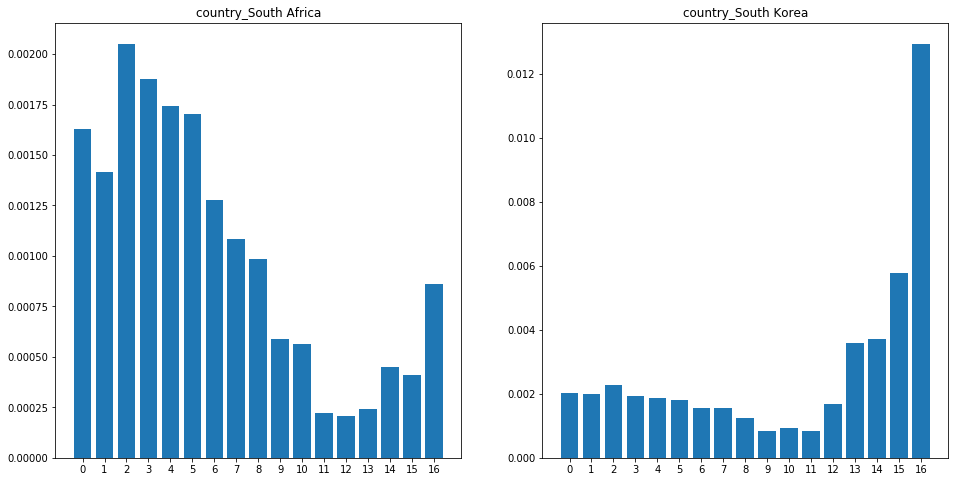

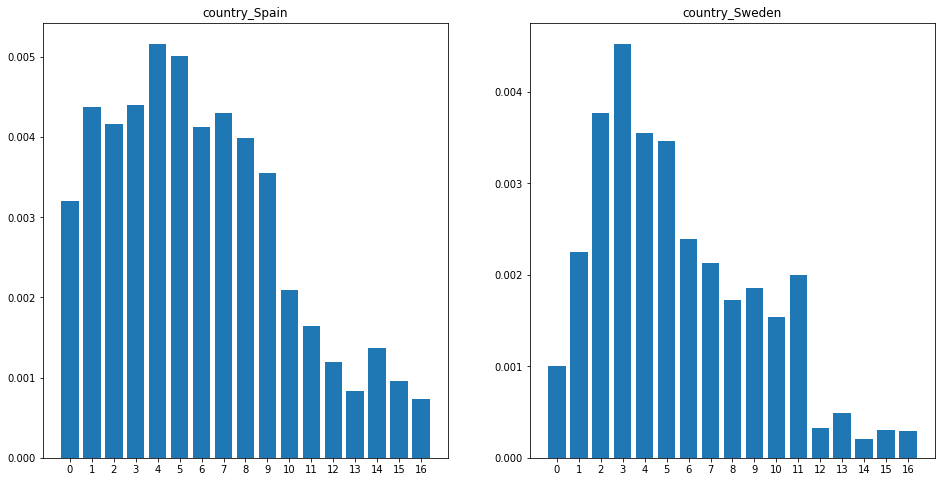

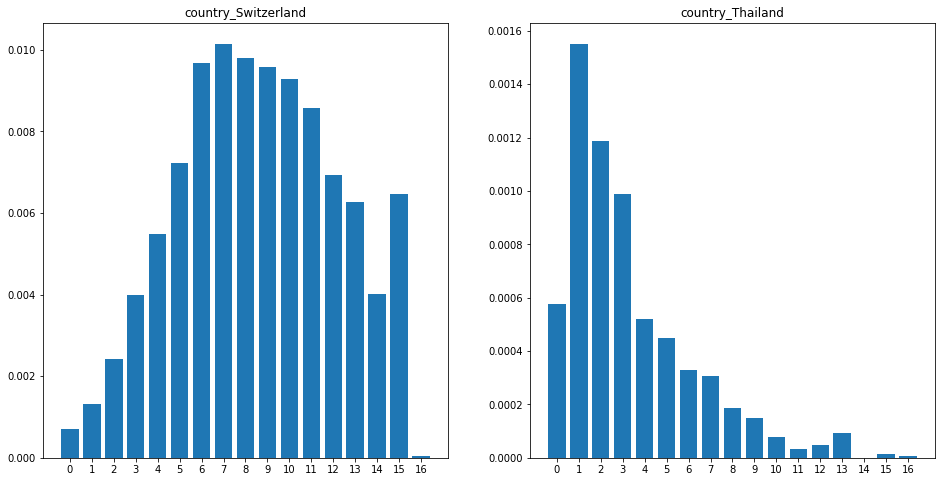

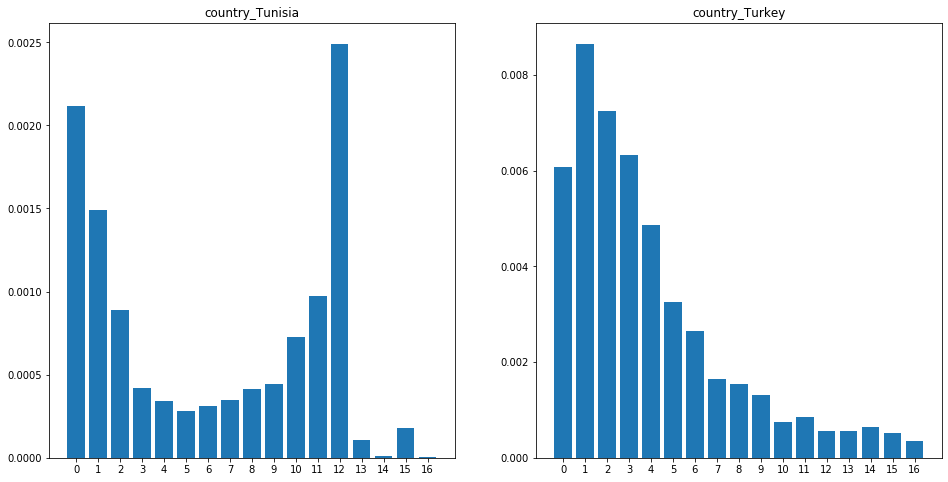

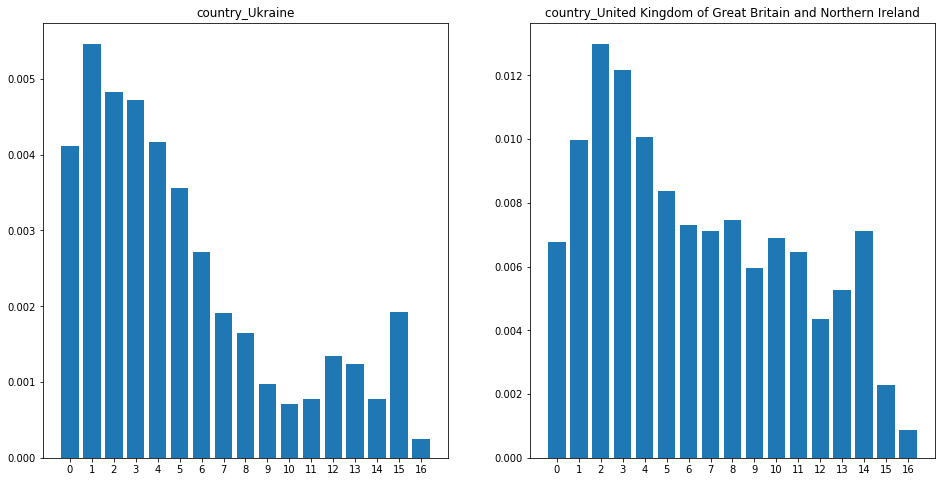

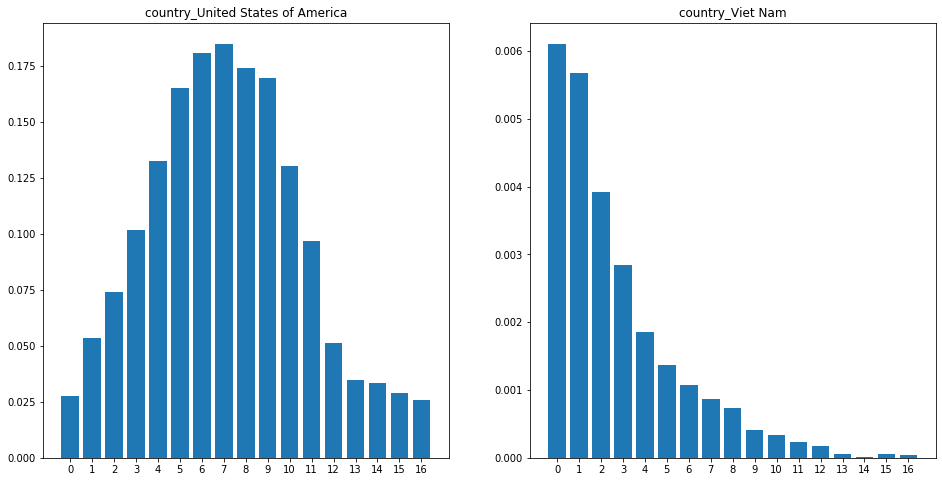

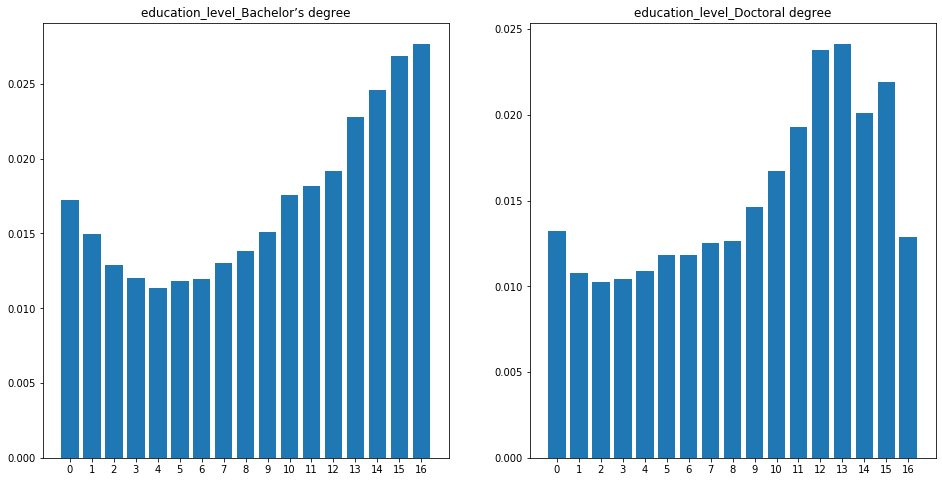

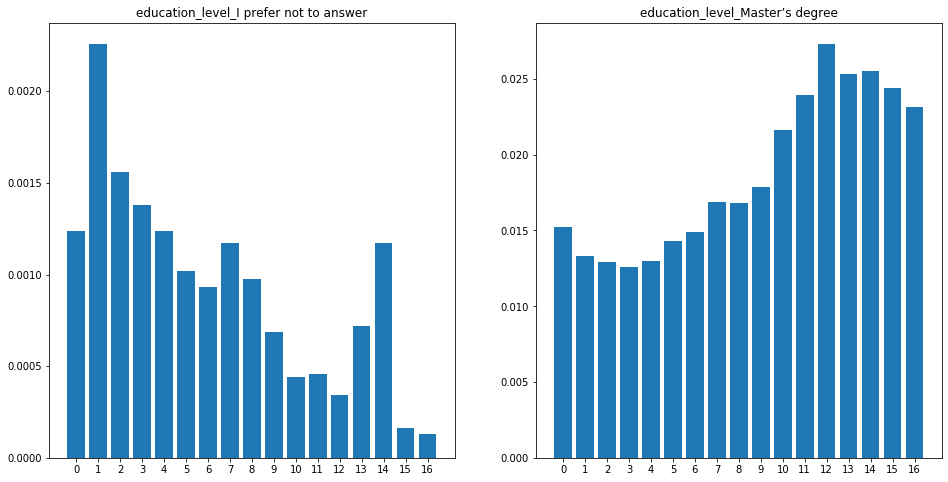

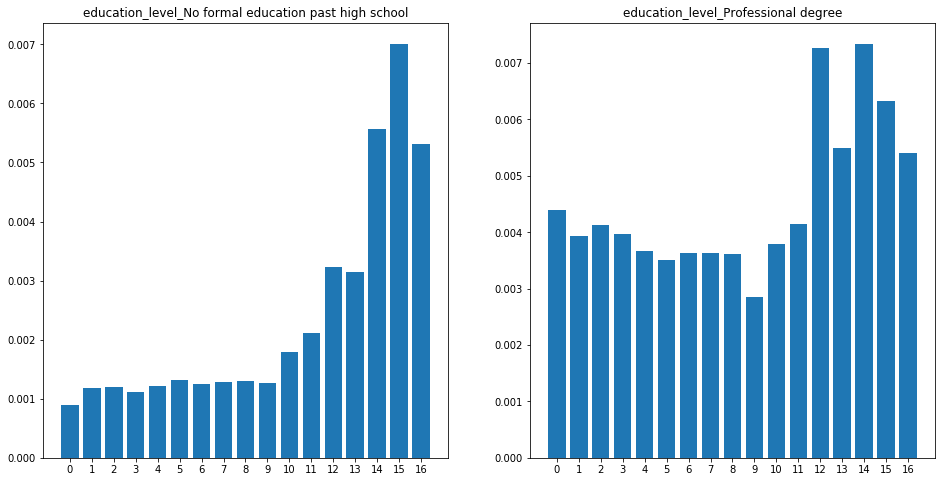

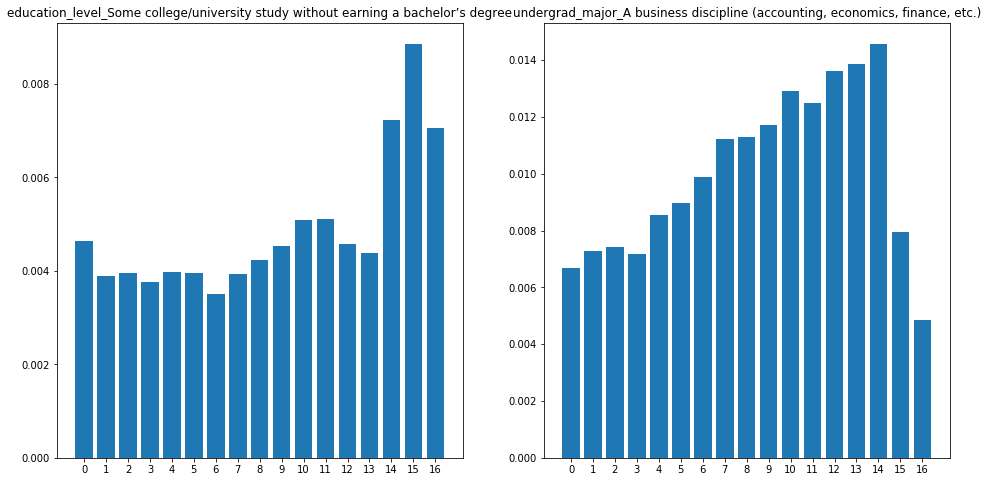

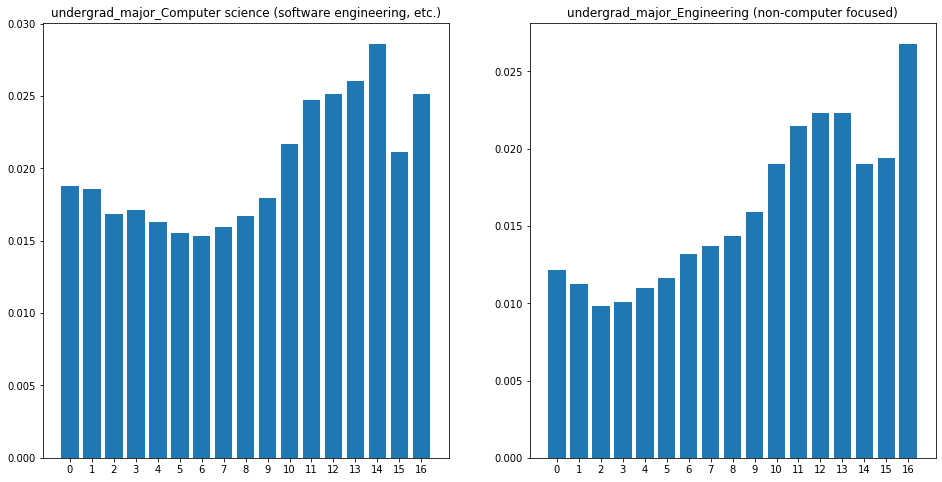

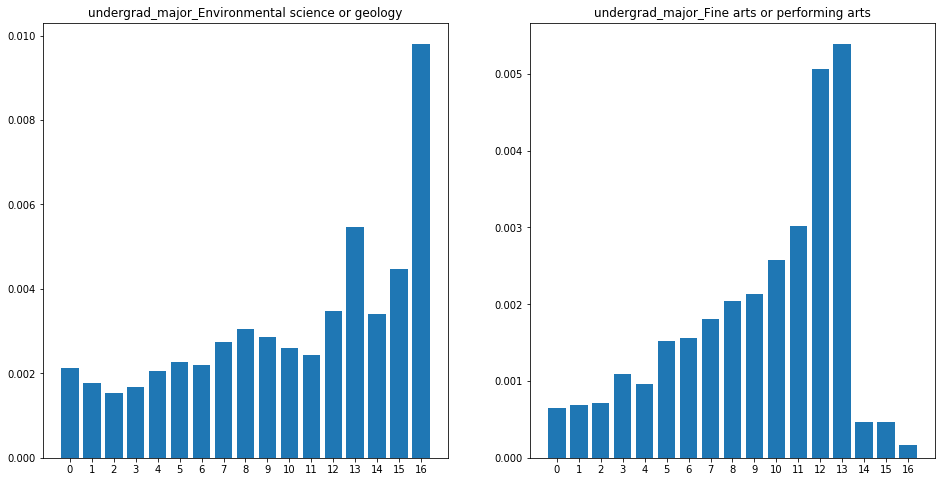

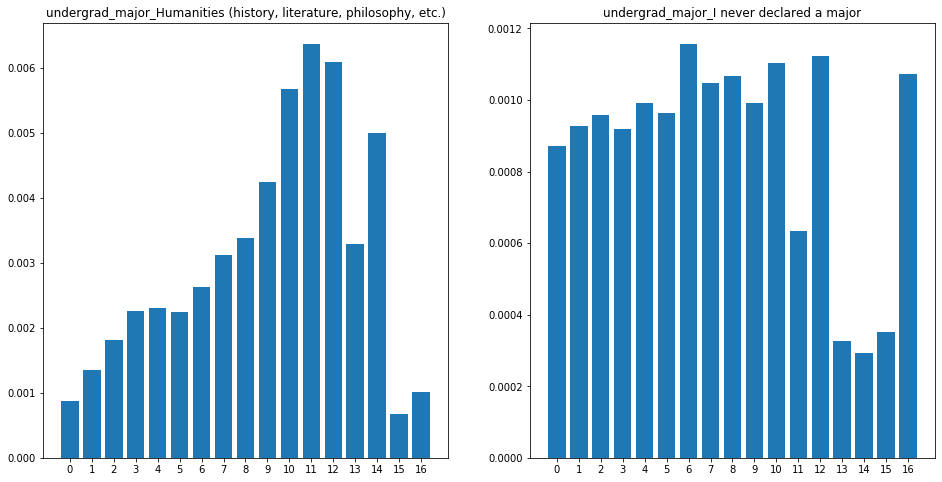

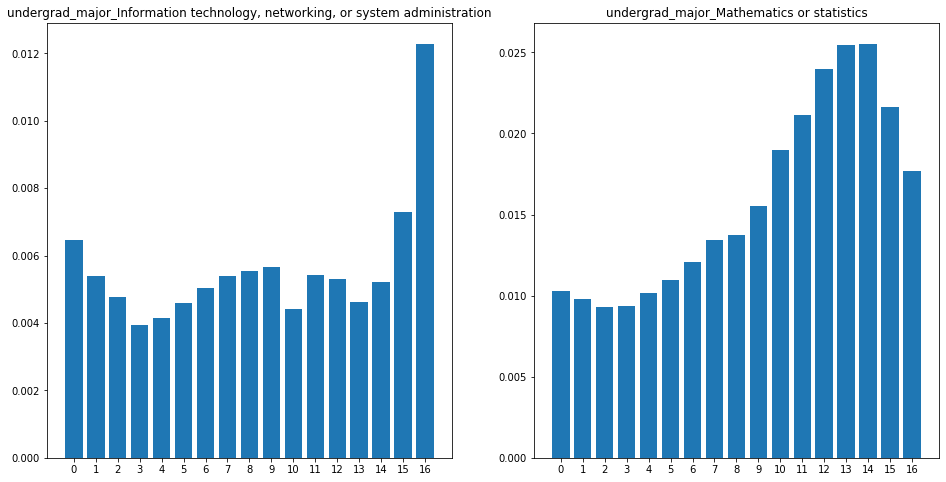

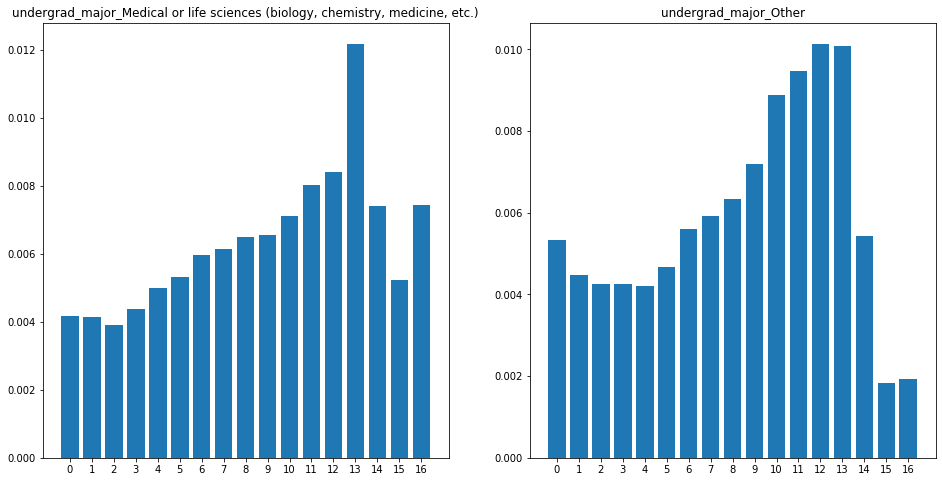

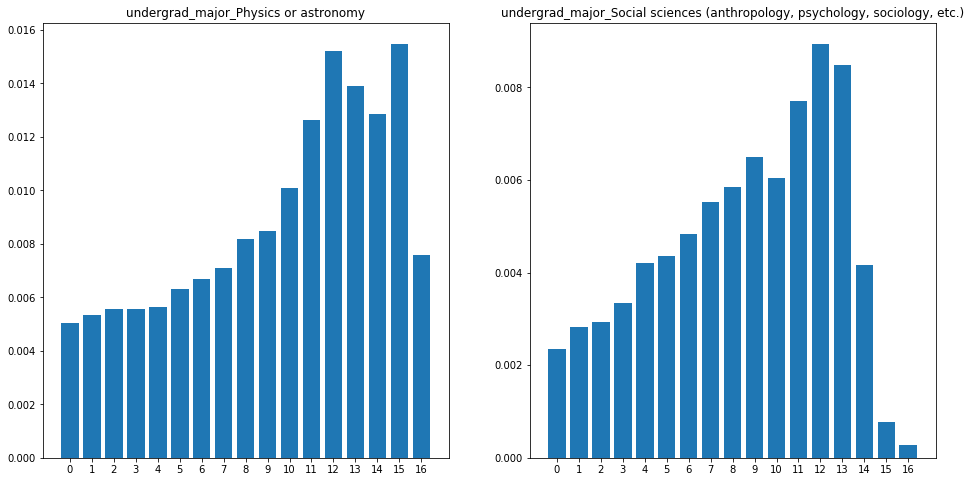

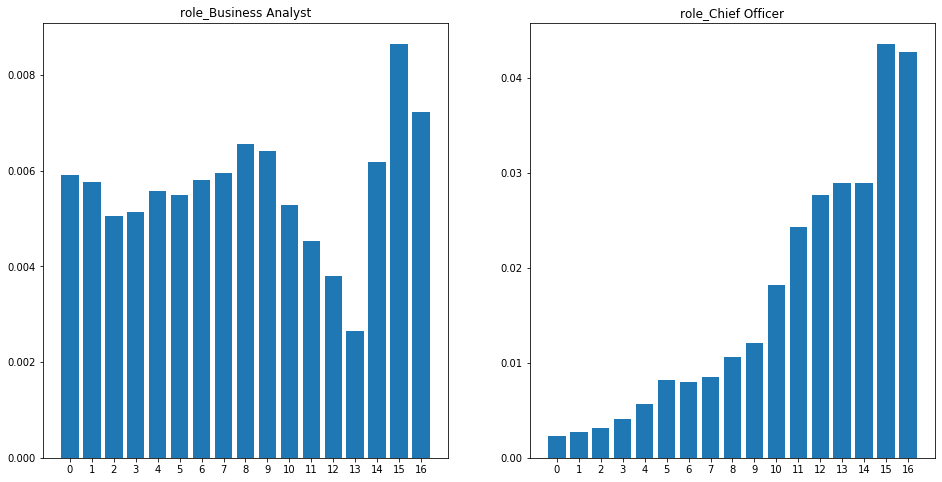

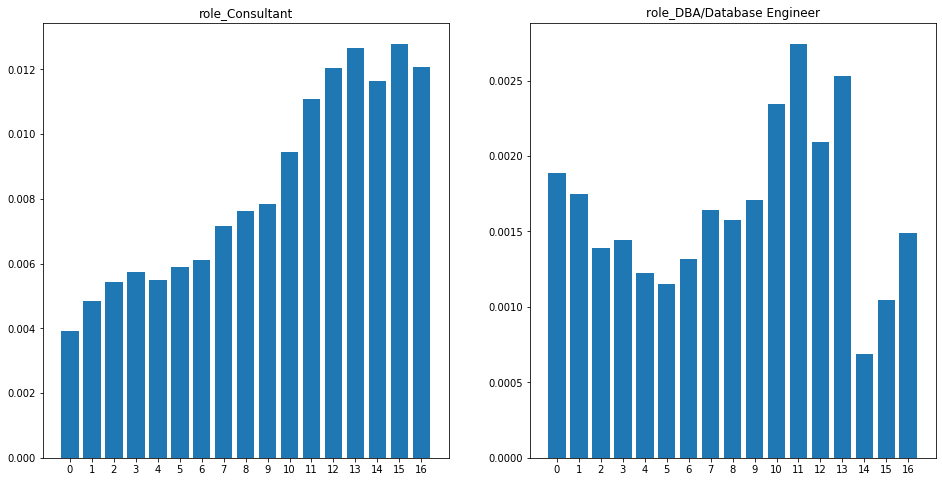

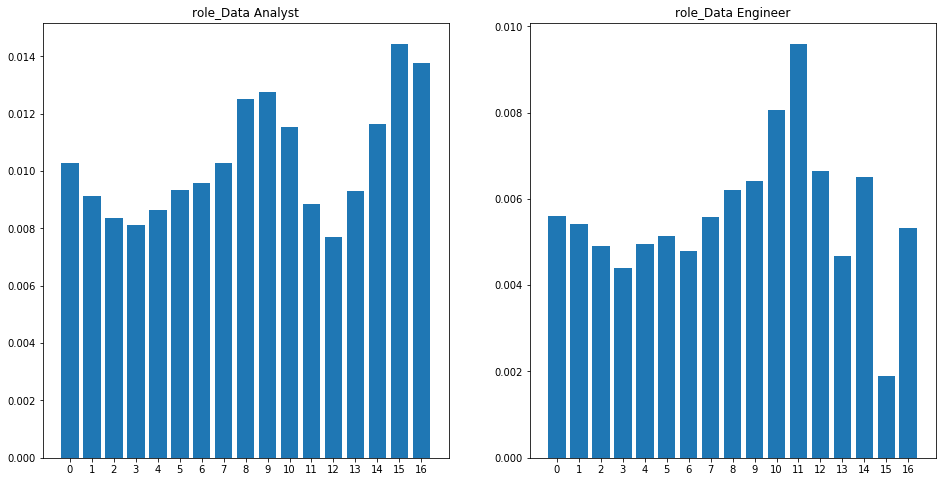

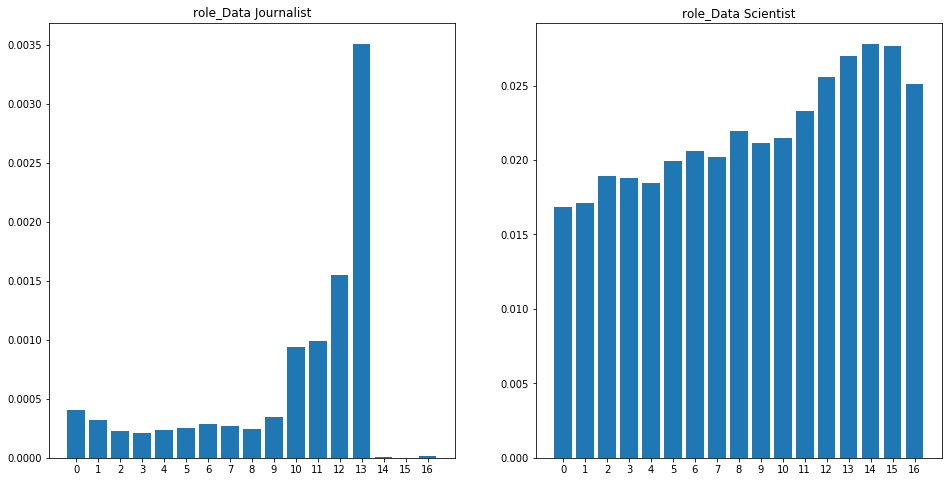

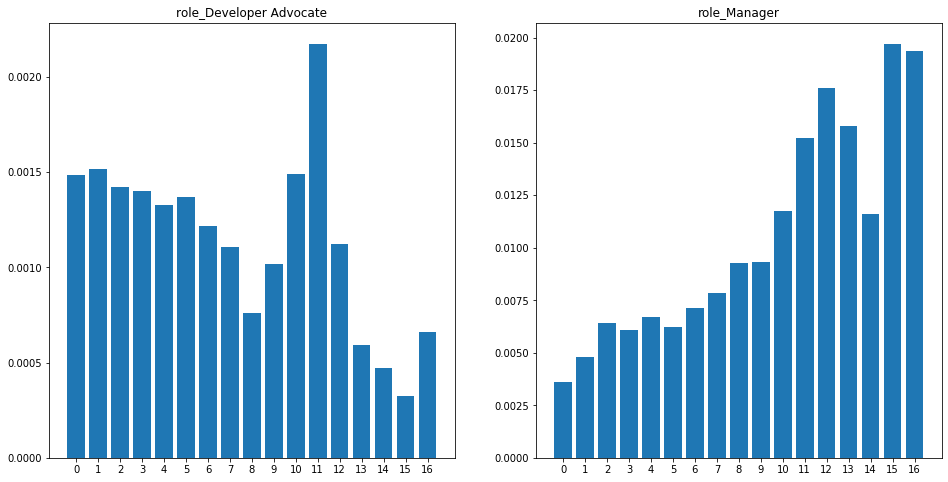

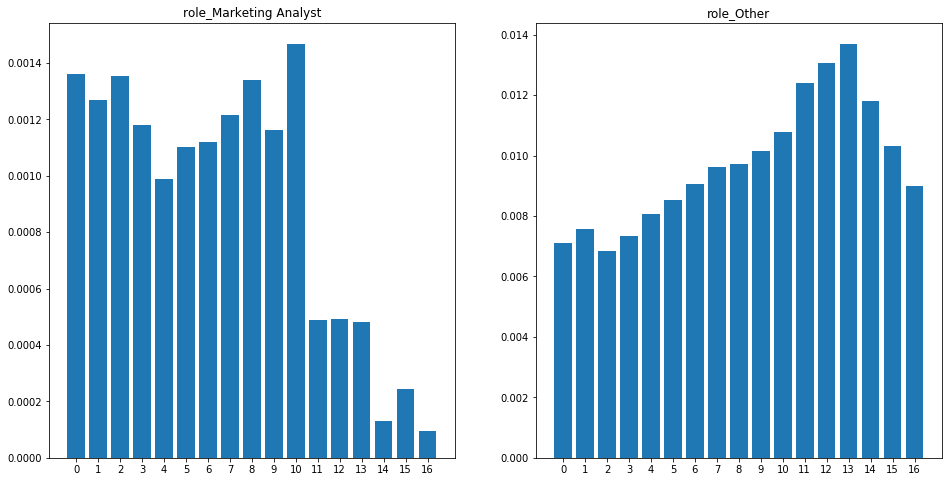

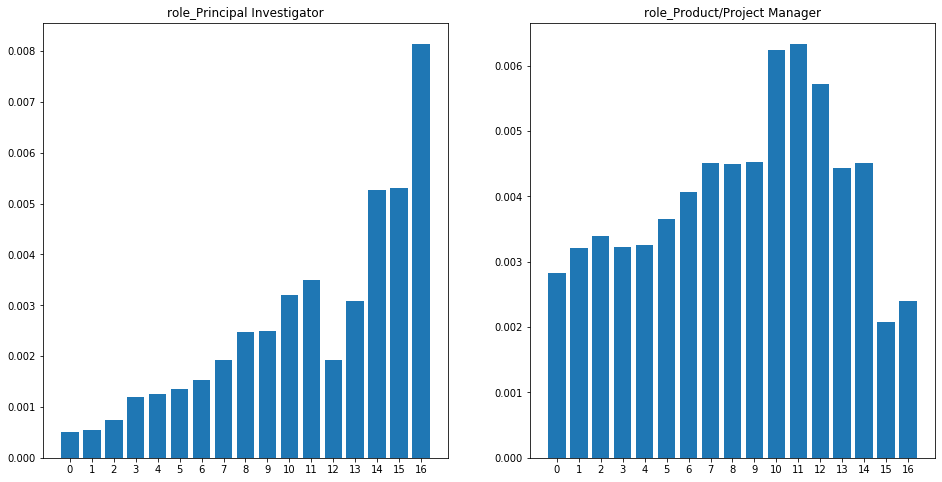

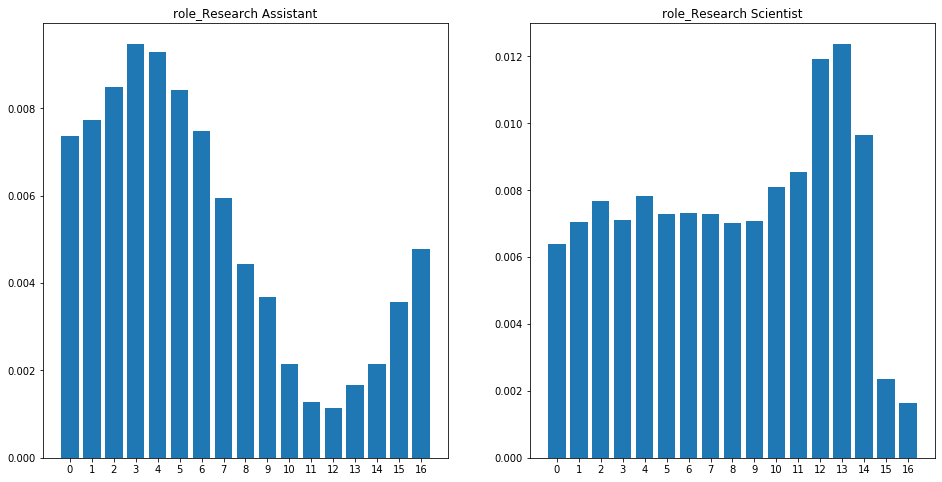

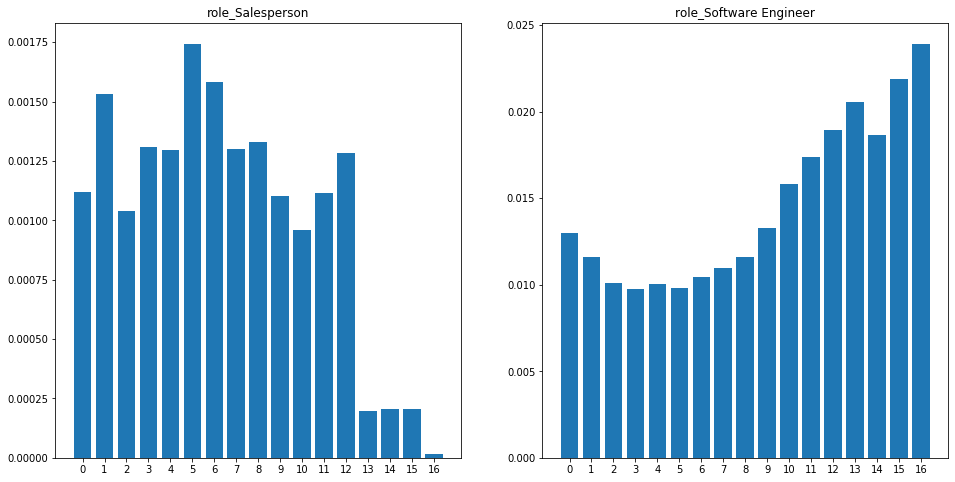

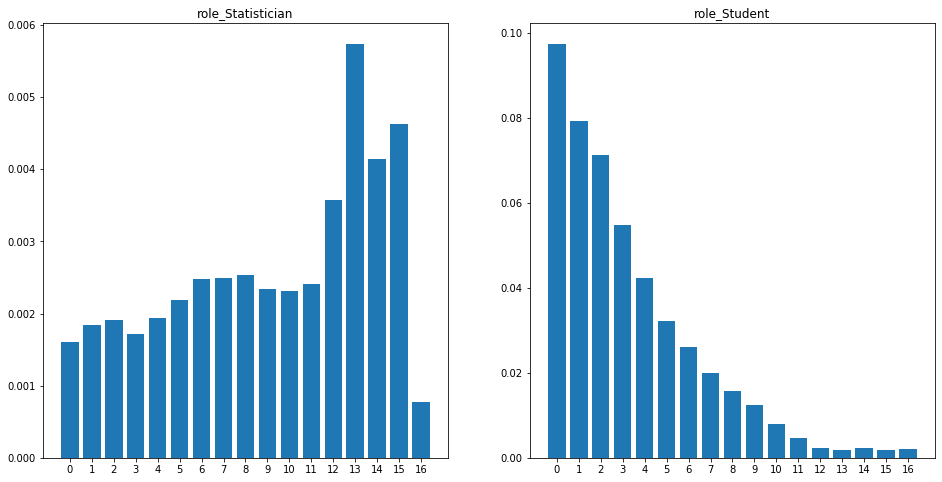

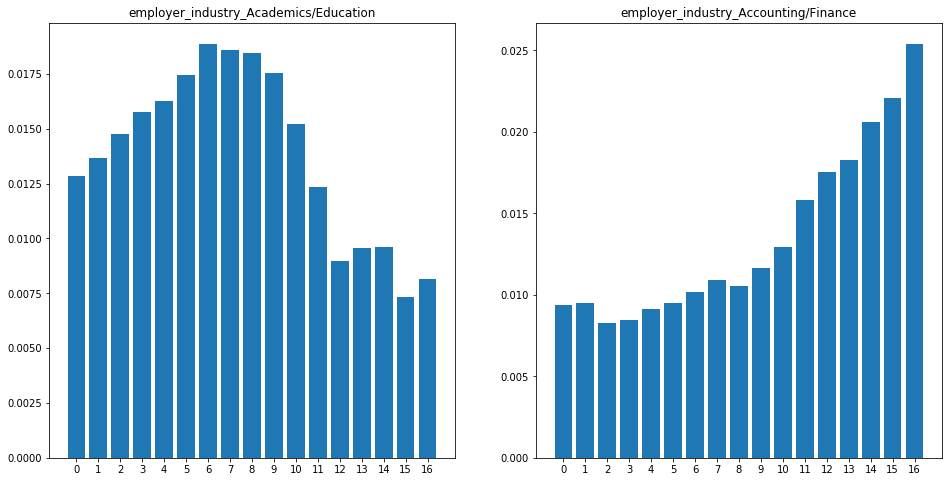

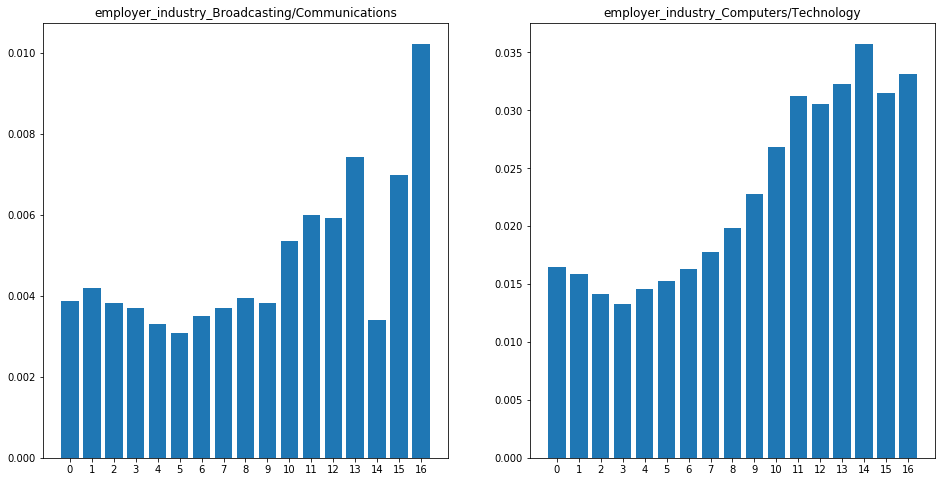

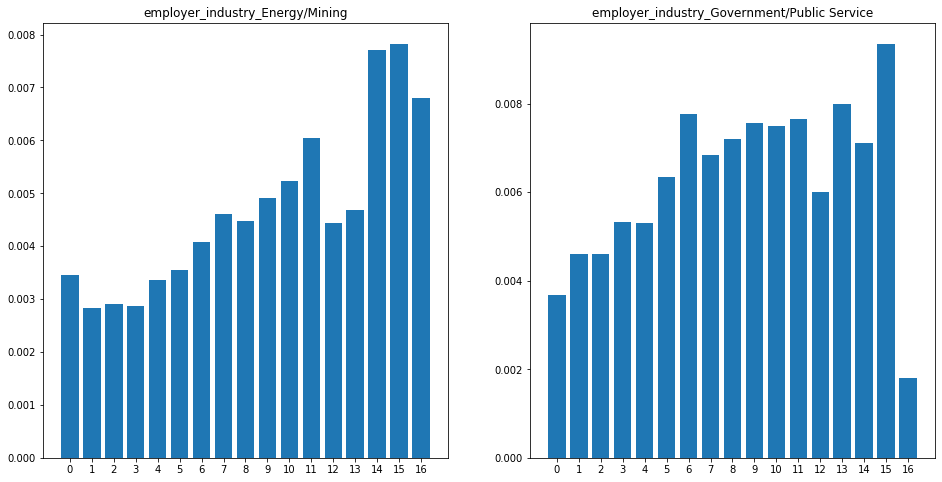

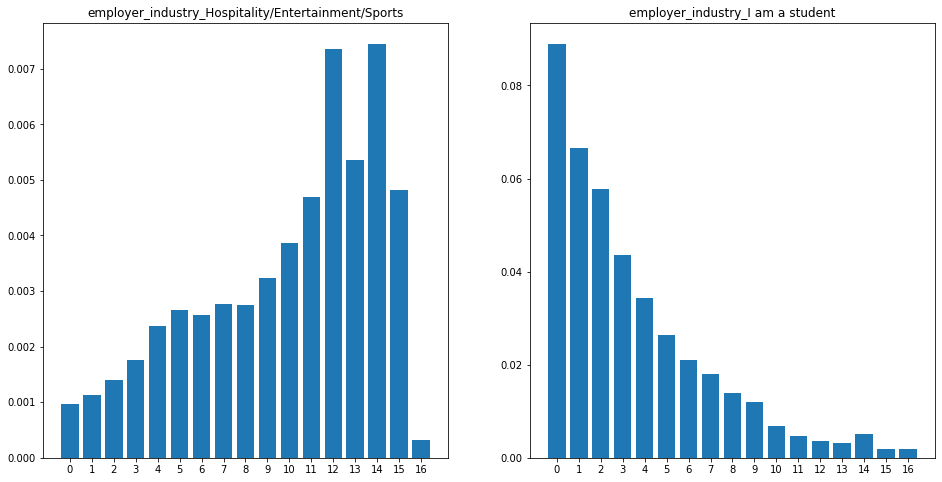

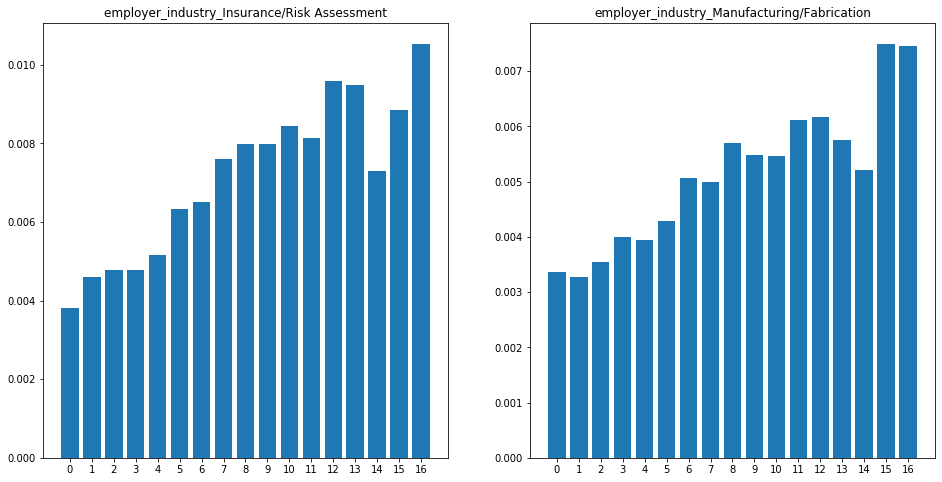

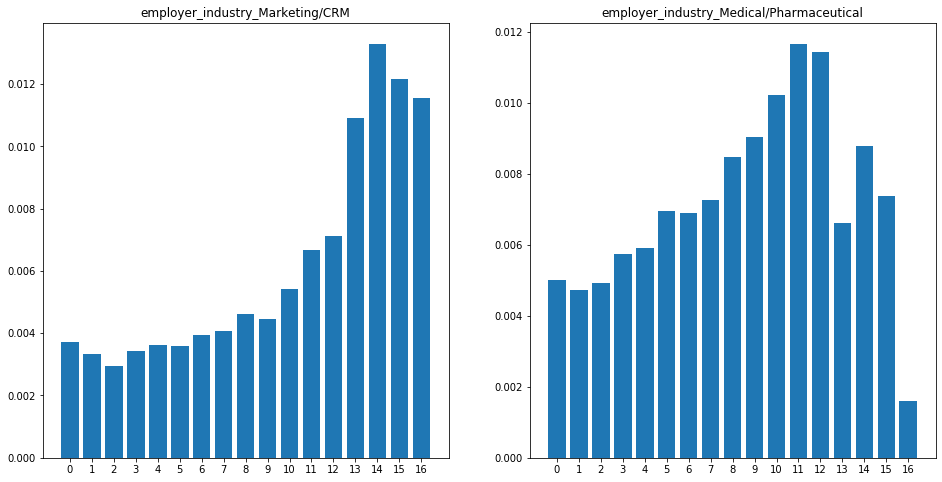

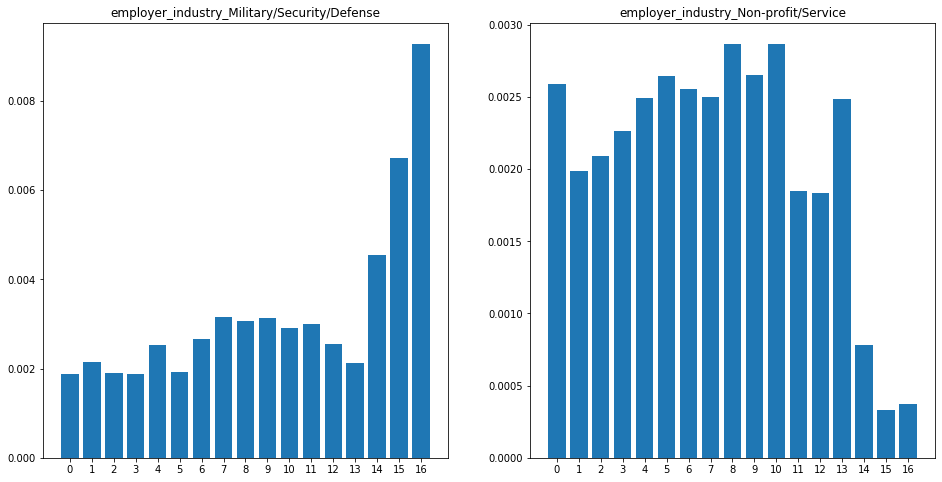

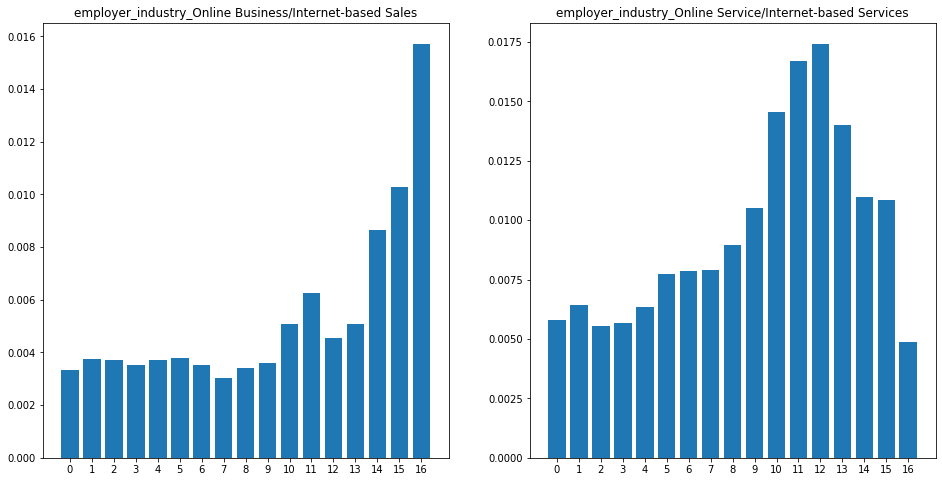

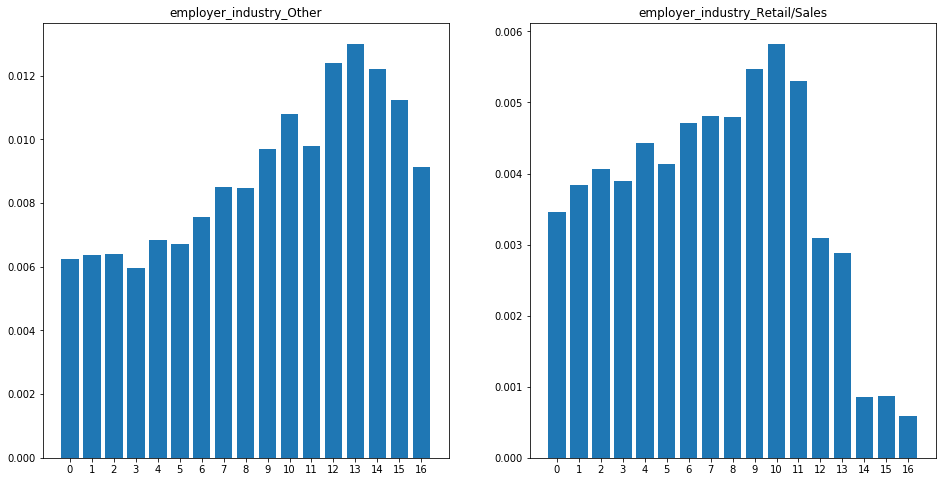

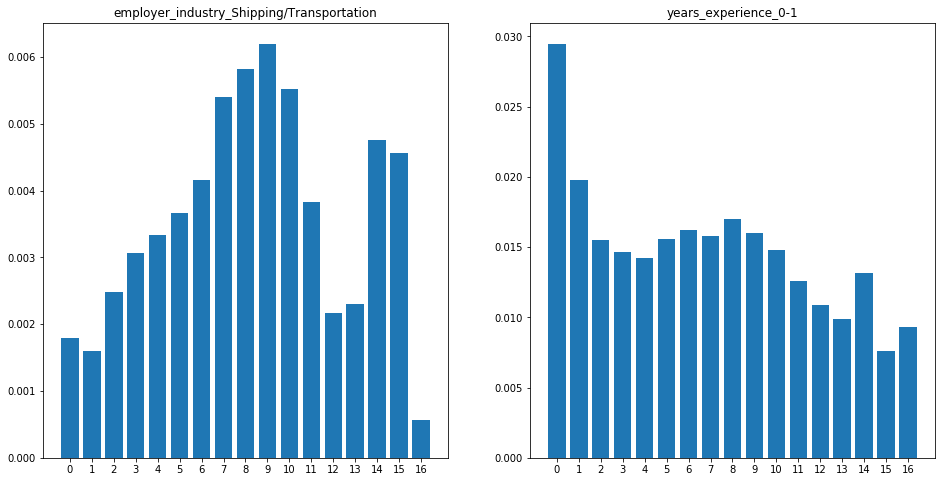

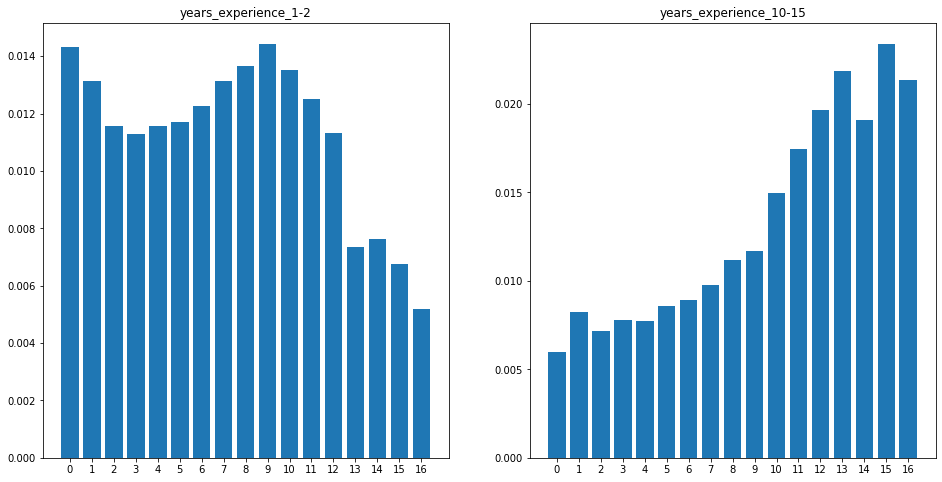

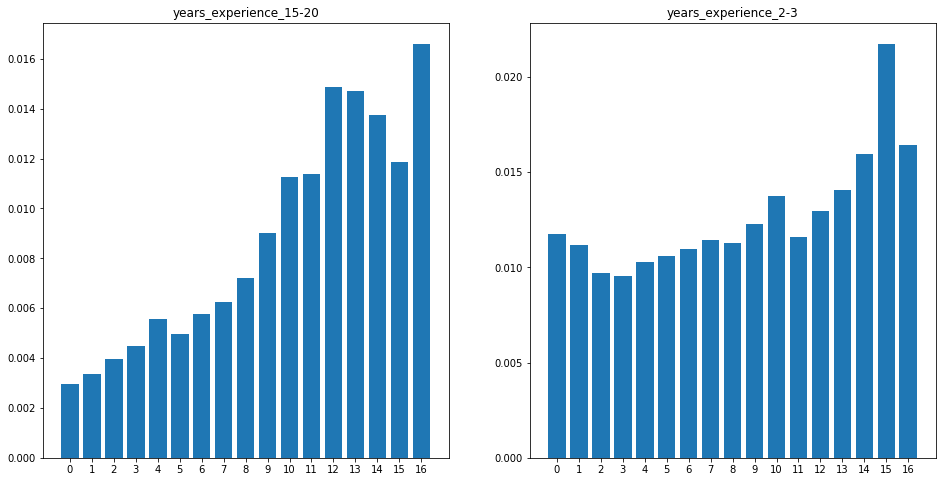

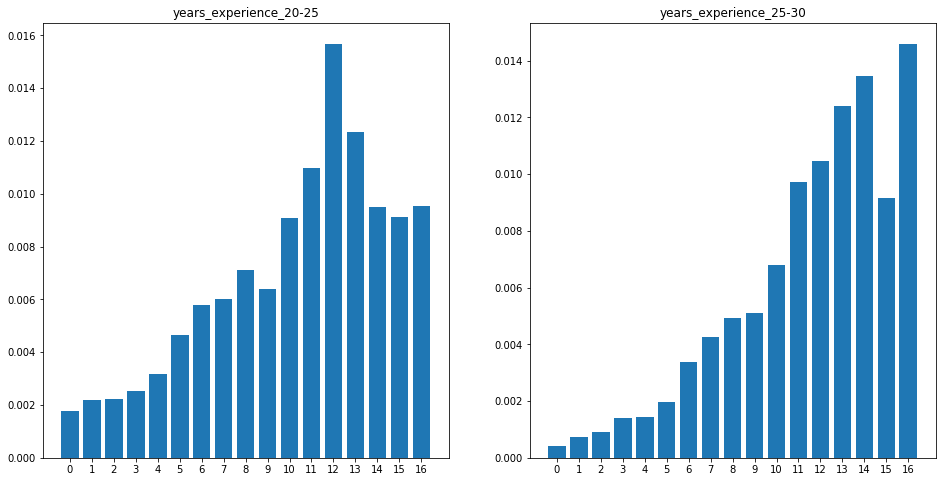

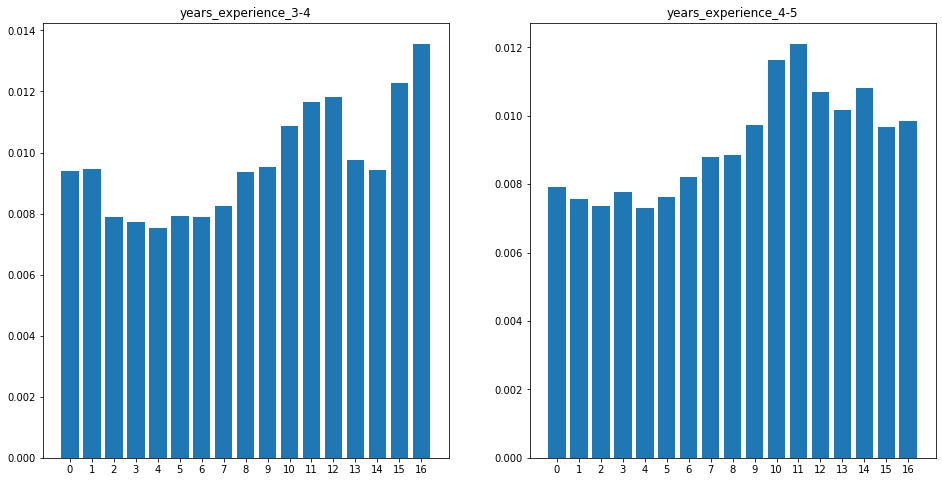

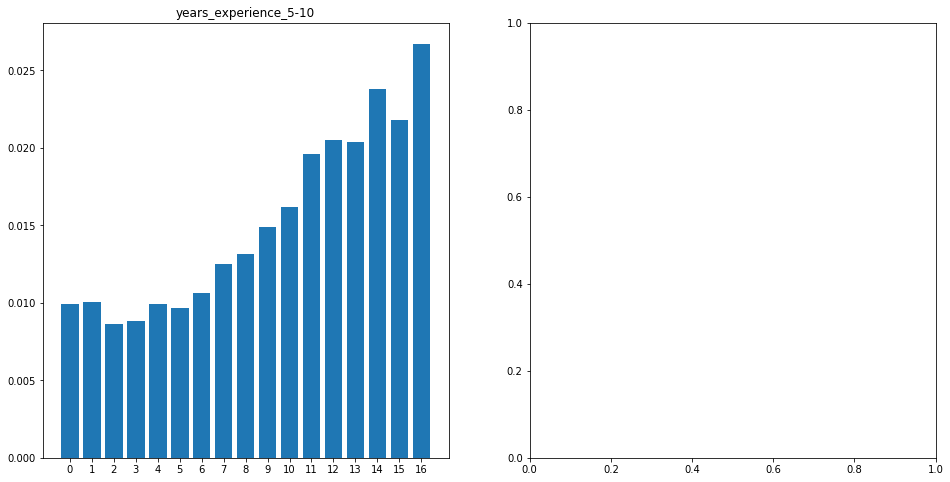

In [56]:

for i, name in enumerate(train_X.columns):
    male_imp = []
    for mod in models:
        male_imp.append(mod.feature_importances_[i])
    if i % 2 == 0:
        _, ax = plt.subplots(ncols=2, figsize=(16, 8))
        ax[0].bar(np.arange(len(male_imp)), male_imp)
        ax[0].set_title(name)
        ax[0].set_xticks(ticks=np.arange(len(male_imp)))
    else:
        ax[1].bar(np.arange(len(male_imp)), male_imp)
        ax[1].set_title(name)
        ax[1].set_xticks(ticks=np.arange(len(male_imp)))
        plt.show()


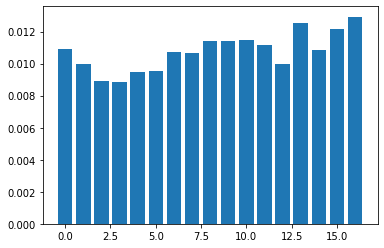

In [43]:
import matplotlib.pyplot as plt
plt.bar(np.arange(len(male_imp)), male_imp);

In [37]:
std, mean = np.std(male_imp), np.mean(male_imp)

In [ ]:
z = 